# Trial Module

- __author__ = 'BlackDChase,MR-TLL'
- __version__ = '0.3.3'
- [Imports](#Imports)
- [Hyperparameter](#Hyperparameters)
- [Training A3C](#Training-A3C)
- [Master Agent](#Master-Agent)
- [Train and Save](#Train-and-Save)
- [Testing Model](#Testing-Model)
- [Train](#Train)
- [Environment](#Environment)
- [Test](#Test)
- [Plotting](#Plotting)

# Imports

In [1]:
from lstm import LSTM
from env import LSTMEnv as ENV
#from TempEnv import TempEnv as ENV
from Agent import GOD
import log
import sys
import torch
from torch import nn, multiprocessing, device, Tensor
import matplotlib.pyplot as plt

# Hyperparameters

In [2]:
"""
Hyperparameters
"""
stateSize = 13
log.info(f"stateSize = {stateSize}")
keywords={
        "n":3,
        "e":25,
        "t":15,
        "a":3,
        "d":False,
        "alr":1e-1,
        "clr":1e-1,
    }
stateSize = 13
log.info(f"stateSize = {stateSize}")

"""
Making the action space
"""
n=int(keywords['a']//2)
if keywords['a']%2==0:
    actionSpace = [i for i in range(-n*2,n*2+1,2)]
    actionSpace.pop(len(actionSpace)//2)
else:
    actionSpace = [i/10 for i in range(-n*25,n*25+1,25)]
keywords['a']=actionSpace

In [3]:
actionSpace

[-2.5, 0.0, 2.5]

# Training A3C

# Master Agent

In [4]:
god = GOD(
    stateSize=int(stateSize),
    actionSpace=keywords["a"],
    debug=keywords["d"],
    maxEpisode=int(keywords["e"]),
    nAgent=int(keywords["n"]),
    trajectoryLength=int(keywords["t"]),
    alr=keywords["alr"],
    clr=keywords["clr"]
)
print("Master Agent Made")
log.info("GOD inititated")
log.info(f"Action space: {actionSpace}")

Master Agent Made


# Train and Save

In [5]:
god.train()
god.saveModel("../Saved_model")

BOSS 01: 100%|##########| 25/25 [00:47<00:00,  1.92s/it]


BOSS 01 has completed training


BOSS 02: 100%|##########| 25/25 [00:49<00:00,  1.96s/it]


BOSS 02 has completed training


BOSS 00: 100%|##########| 25/25 [00:49<00:00,  1.96s/it]


BOSS 00 has completed training


# Testing Model

# Enviornment

In [6]:
#"""# Using LSTM Model as ENV
output_size = 13
input_dim = output_size
hidden_dim = 128
layer_dim = 1
model = LSTM(output_size, input_dim, hidden_dim, layer_dim,debug=keywords["d"])
model.loadM("ENV_MODEL/lstm_model.pt")
log.info(f"LSTM Model = {model}")
#env=ENV(model,"../Dataset/13_columns.csv")
env=ENV(
    model=model,
    dataset_path="../datasets/normalized_weird_13_columns_with_supply.csv",
    actionSpace=actionSpace,
    debug=keywords["d"],
)
env.reset()
print("Environment inititated")
"""
env = ENV(stateSize,actionSpace)
#"""
log.info("Environment inititated")

god.giveEnvironment(env)
log.info("Environment parsed, Boss inititated")

Environment inititated


# Test

In [7]:
"""
for 100 timesteps
"""
time=100
a3cStates = god.test(time=time)
normalStates = god.getNormalStates(time=time)
profit,profitA3C = god.compare(a3cState=a3cStates,normalState=normalStates)

/media/black/Data/GIT/OptimizeDemandResponse/Profit-Optimizer-A3C/modules/Agent.py:185: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  a3cState = np.array(a3cState)
/media/black/Data/GIT/OptimizeDemandResponse/Profit-Optimizer-A3C/modules/Agent.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a3cState = np.array(a3cState)


# Plotting

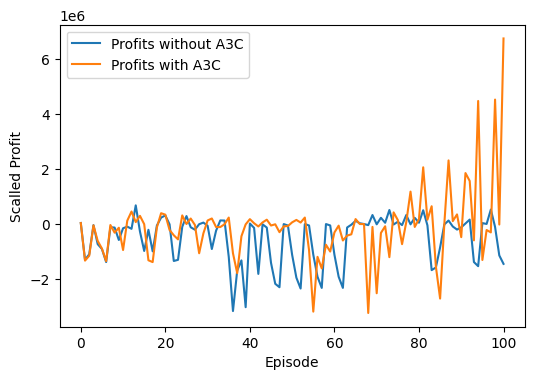

In [8]:
plt.figure(dpi=100)
plt.xlabel("Episode")
plt.ylabel("Scalled Profit")
plt.plot(profit,label='Profits without A3C')
plt.plot(profitA3C,label='Profits with A3C')
plt.legend()
plt.show()